In [11]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot
from train import Results

In [16]:
exp='lenk classification'
if exp=='exp reg synthetic':
    #folder = 'exps/exp1/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'fista\', \'subgd\', \'ssubgd\']ist[\'fista\', \'subgd\', \'ssubgd\']n10val_perc0.0-2019-01-31 13:23:14.322002'
    #folder = 'exps77/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-11 12:37:04.184427'
    folder = 'exps77/exp_duality_gap_MAC/exp1/'
    T=500
    x_right=500
elif exp =='exp class synthetic':
    #folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-08 22%3a00%3a35.758740'
    #folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n10val_perc0.0-2019-02-08 11%3a16%3a06.897500'
    folder = 'exps77/exp_duality_gap_MAC/exp2/'
    T=500
    x_right=500
elif exp =='lenk regression':
    #folder = 'exps77/grid_searchexpLenkRegn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 14:48:50.964294/'
    folder = 'exps77/exp_duality_gap_MAC/expLenkReg/'
    T=100
    x_right=100
elif exp =='lenk classification':
    #folder = 'exps77/grid_searchexpLenkn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 18:54:20.948679'
    folder = 'exps77/exp_duality_gap_MAC/expLenkClass/'
    T=100
    x_right=100

title=''
metric='accuracy'
y_label='Test Error'
save=True
save_dir = 'plotsf'

if not save:
    save_dir=None

files = os.listdir(folder)
def get_file(starts_with):
    for f in files:
        if f.startswith(metric+'-'+starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None
result_dict = {}
def put_in_dict(starts_with, name, color=None):
    metrics = {'': 1-get_file(starts_with=starts_with)}
    print(metrics)
    r = Results(None, False, False, name=name)
    r.add_metrics(metrics)
    r.color = color
    result_dict[name] = r

In [17]:
erm_alg='fista'
put_in_dict('ITL-ts'+erm_alg, 'ITL ERM', 'black')
put_in_dict('ITL-tsssubgd', 'ITL SGD', 'darkred')

put_in_dict('LTL-trssubgdtsssubgd', 'LTL SGD-SGD', 'c')
put_in_dict('LTL-tr'+erm_alg+'tsssubgd', 'LTL ERM-SGD', 'b')
#put_in_dict('LTL-trssubgdts'+erm_alg, 'LTL SGD-ERM', 'm')
put_in_dict('LTL-tr'+erm_alg+'ts'+erm_alg, 'LTL ERM-ERM', 'red')

if exp != 'lenk':
    put_in_dict('MEAN-ts'+erm_alg, 'MEAN ERM', 'green')
    put_in_dict('MEAN-tsssubgd', 'MEAN SGD', 'orange')

{'': array([0.30625 , 0.30625 , 0.375   , 0.35    , 0.34375 , 0.325   ,
       0.328125, 0.334375, 0.35    , 0.3125  , 0.328125, 0.340625,
       0.325   , 0.36875 , 0.325   , 0.3125  , 0.328125, 0.346875,
       0.325   , 0.346875, 0.3375  , 0.33125 , 0.3375  , 0.328125,
       0.3375  , 0.33125 , 0.34375 , 0.325   , 0.315625, 0.3125  ])}
-----------ITL ERM- mean std 0.3326041666666667 0.016090631440030218
{'': array([0.378125, 0.38125 , 0.40625 , 0.396875, 0.39375 , 0.3625  ,
       0.371875, 0.421875, 0.44375 , 0.4     , 0.4     , 0.40625 ,
       0.375   , 0.40625 , 0.346875, 0.403125, 0.428125, 0.390625,
       0.35625 , 0.390625, 0.371875, 0.390625, 0.39375 , 0.396875,
       0.390625, 0.3875  , 0.39375 , 0.384375, 0.3625  , 0.359375])}
-----------ITL SGD- mean std 0.3896875 0.02101199434251779
{'': array([[0.346875, 0.415625, 0.4125  , ..., 0.396875, 0.396875, 0.3625  ],
       [0.340625, 0.35    , 0.375   , ..., 0.34375 , 0.35625 , 0.334375],
       [0.403125, 0.35625 , 0.25   

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [ ]:
def plot_resultsList(T, results_dict, y_label='', title='', save_dir_path=None, show_plot=True,
                     filename='metric_test'):

    alpha = 0.1
    size=0.9
    my_dpi=300
    plt.figure(figsize=(size*7, size*4))
    plt.tight_layout()
    
    x = list(range(T))
    for _, results in results_dict.items():
        _plot(results.metrics, '', alpha, x=x, label=results.name, color=results.color)

    plt.title(title)
    plt.ylabel(y_label)
    #plt.ylim(0.08, 0.14)
    plt.xlabel('T')
    plt.xlim(right=x_right, left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+str(size)+'.png'), bbox_inches = "tight", dpi=my_dpi)
        #pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        #tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    plt.close()

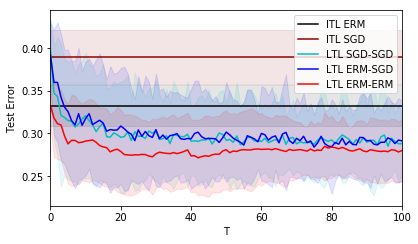

In [18]:
plot_resultsList(T+1, result_dict, y_label, title, save_dir, True, filename=exp+metric+'ERMvsSGD-T'+str(x_right))